<a href="https://colab.research.google.com/github/arashkhgit/DataScience-cheat-sheet/blob/main/Snapp!_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

chunk_size = 10000
data_chunks = pd.read_csv('/content/dataset_orders.csv', chunksize=chunk_size)
data = pd.concat(data_chunks)


# Data Cleaning and Preprocessing:



*   Handle missing data: Identify missing values and decide how to deal with them (e.g., impute, drop, or leave as-is).
*   Remove duplicate records, if any, to avoid skewing analysis results.
*   Address data inconsistencies, such as spelling errors, capitalization, or data entry mistakes.
*   Handle outliers if they exist and could influence the analysis.








### Step 1: Data Examination

In [52]:
# Check the basic information of the data
print("Step 1: Data Information")
print(data.info())

Step 1: Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375068 entries, 0 to 375067
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      375068 non-null  int64  
 1   create_time   375068 non-null  object 
 2   category      375068 non-null  object 
 3   city          375068 non-null  object 
 4   customer_id   375068 non-null  int64  
 5   price         375068 non-null  int64  
 6   distance      375068 non-null  float64
 7   status        375068 non-null  object 
 8   cancelled_by  164657 non-null  object 
 9   biker_id      255525 non-null  float64
 10  accept_time   375068 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 31.5+ MB
None


### Step 2: Missing Value Analysis

In [53]:
# Check for missing values in each column
print("\nStep 2: Missing Values")
missing_values = data.isnull().sum()
print(missing_values)


Step 2: Missing Values
order_id             0
create_time          0
category             0
city                 0
customer_id          0
price                0
distance             0
status               0
cancelled_by    210411
biker_id        119543
accept_time          0
dtype: int64


### Step 3: Data Cleaning

In [54]:
# Step 3.1: Convert date columns to proper datetime format
data['create_time'] = pd.to_datetime(data['create_time'])
data['accept_time'] = pd.to_datetime(data['accept_time'])

# Step 3.2: Convert 'price' and 'Distance' columns to numeric (if they contain numeric values)
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data['distance'] = pd.to_numeric(data['distance'], errors='coerce')

# Step 3.3: Handle missing values in 'biker_id'
# Since 'biker_id' is empty when the order is not accepted, let's fill it with a more appropriate value, such as 'NOT_ACCEPTED'
data['biker_id'].fillna('NOT_ACCEPTED', inplace=True)

# Step 3.4: Handle missing values in 'cancelled_by'
# Fill missing values in 'cancelled_by' with "UNKNOWN"
data['cancelled_by'].fillna("UNKNOWN", inplace=True)

### Step 4: Data Preprocessing

In [55]:
# Step 4.1: Convert text columns to lowercase
data['category'] = data['category'].str.lower()
data['city'] = data['city'].str.lower()
data['status'] = data['status'].str.lower()
data['cancelled_by'] = data['cancelled_by'].str.lower()

# Step 4.2: Remove duplicate rows, if any
data.drop_duplicates(inplace=True)

# Step 4.3: Convert 'order_id', 'customer_id', and 'biker_id' to integers
data['order_id'] = data['order_id'].astype(int)
data['customer_id'] = data['customer_id'].astype(int)

In [56]:
missing_values = data.isnull().sum()
print(missing_values)

order_id        0
create_time     0
category        0
city            0
customer_id     0
price           0
distance        0
status          0
cancelled_by    0
biker_id        0
accept_time     0
dtype: int64


### Step 4: Exploratory Data Analysis (EDA)

In [57]:
# Step 4.1: Summary Statistics
print("\nStep 4.1: Summary Statistics")
print(data.describe())

# Step 4.2: Category-wise Analysis
print("\nStep 4.2: Category-wise Analysis")
category_counts = data['category'].value_counts()
print(category_counts)

# Step 4.3: City-wise Analysis
print("\nStep 4.3: City-wise Analysis")
city_counts = data['city'].value_counts()
print(city_counts)

# Step 4.4: Status-wise Analysis
print("\nStep 4.4: Status-wise Analysis")
status_counts = data['status'].value_counts()
print(status_counts)

# Step 4.5: Cancellation Reasons Analysis
print("\nStep 4.5: Cancellation Reasons Analysis")
cancelled_by_counts = data['cancelled_by'].value_counts()
print(cancelled_by_counts)

# Step 4.6: Price and Distance Analysis
print("\nStep 4.6: Price and Distance Analysis")
print("Average Price:", data['price'].mean())
print("Maximum Price:", data['price'].max())
print("Minimum Price:", data['price'].min())
print("Average Distance:", data['distance'].mean())
print("Maximum Distance:", data['distance'].max())
print("Minimum Distance:", data['distance'].min())


Step 4.1: Summary Statistics
           order_id   customer_id         price       distance
count  3.750680e+05  3.750680e+05  3.750680e+05  375068.000000
mean   8.999800e+07  7.120808e+05  1.615349e+05       9.116743
std    5.778507e+06  2.005503e+06  1.772371e+05       8.932254
min    8.000106e+07  1.000000e+00  1.000000e+04      -0.000300
25%    8.498805e+07  1.000000e+00  6.000000e+04       3.461000
50%    8.999131e+07  1.000000e+00  1.000000e+05       6.844000
75%    9.501505e+07  2.000000e+00  1.900000e+05      12.045400
max    1.000009e+08  7.999915e+06  4.395000e+06     345.040000

Step 4.2: Category-wise Analysis
bwb     214233
pass     75097
vn       40675
bik      40175
car       2492
vn_h      2396
Name: category, dtype: int64

Step 4.3: City-wise Analysis
tehran     150241
isfahan     50428
mashhad     47250
shiraz      46049
qom         26496
ahvaz       21927
karaj       19430
tabriz       8798
kerman       2665
yazd         1781
tabas           3
Name: city, dtype: int

### Step 5: Data Visualization

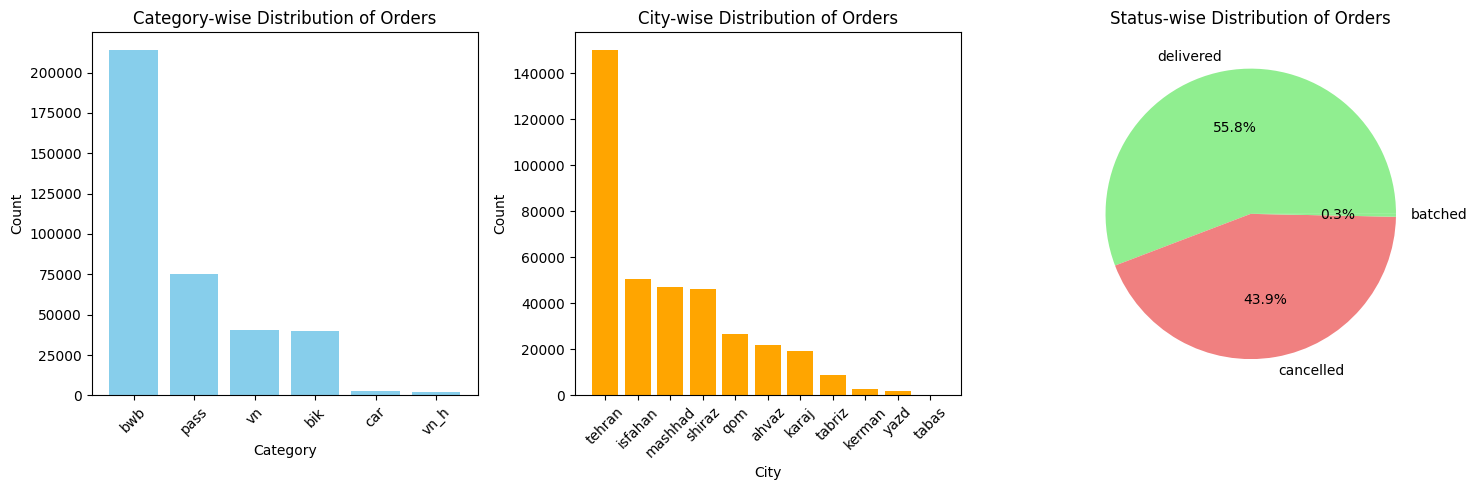

In [58]:
# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Category-wise Bar Plot
axs[0].bar(category_counts.index, category_counts.values, color='skyblue')
axs[0].set_xlabel('Category')
axs[0].set_ylabel('Count')
axs[0].set_title('Category-wise Distribution of Orders')
axs[0].tick_params(axis='x', rotation=45)

# City-wise Bar Plot
axs[1].bar(city_counts.index, city_counts.values, color='orange')
axs[1].set_xlabel('City')
axs[1].set_ylabel('Count')
axs[1].set_title('City-wise Distribution of Orders')
axs[1].tick_params(axis='x', rotation=45)

# Status Pie Chart
axs[2].pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
axs[2].set_title('Status-wise Distribution of Orders')

# Adjust layout and display the combined chart
plt.tight_layout()
plt.show()

<ipython-input-59-5a99fc297238>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


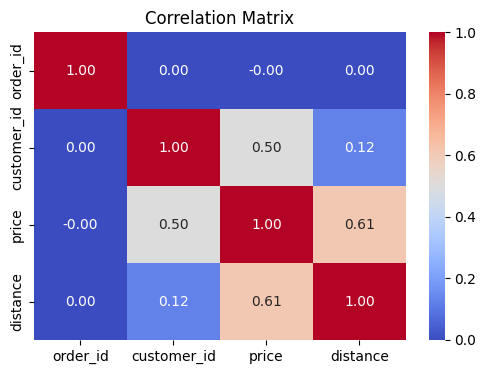

In [59]:
# Correlation Matrix and Heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Step 6: Data validation

Data validation is a critical step to ensure that the data cleaning and preprocessing have been performed correctly and that the data meets quality standards. In this process, we will cross-check the preprocessed data against the original data or known data to verify its correctness. Let's perform data validation for your preprocessed data:

In [60]:
# Step 0: Load the original data into a DataFrame
chunk_size = 10000
data_chunks = pd.read_csv('/content/dataset_orders.csv', chunksize=chunk_size)
original_data = pd.concat(data_chunks)

# Save the preprocessed data to a CSV file
data.to_csv('/content/preprocessed_data.csv', index=False)

# Read the preprocessed data from the saved CSV file
preprocessed_data = pd.read_csv('/content/preprocessed_data.csv')

In [61]:
# Step 6.1: Compare the number of rows in original and preprocessed data
original_rows, original_cols = original_data.shape
preprocessed_rows, preprocessed_cols = preprocessed_data.shape

if original_rows == preprocessed_rows:
    print("Step 6.1: Number of rows in original and preprocessed data match.")
else:
    print("Step 6.1: Number of rows in original and preprocessed data do not match. Check for potential issues.")

# Step 6.2: Compare the columns in original and preprocessed data
original_columns = set(original_data.columns)
preprocessed_columns = set(preprocessed_data.columns)

if original_columns == preprocessed_columns:
    print("Step 6.2: Columns in original and preprocessed data match.")
else:
    print("Step 6.2: Columns in original and preprocessed data do not match. Check for potential issues.")

# Step 6.3: Check for any missing values in preprocessed data
missing_values_preprocessed = preprocessed_data.isnull().sum().sum()

if missing_values_preprocessed == 0:
    print("Step 6.3: No missing values in the preprocessed data.")
else:
    print(f"Step 6.3: Preprocessed data contains {missing_values_preprocessed} missing values.")

# Step 6.4: Verify data transformation and cleaning results for specific columns
# (You can cross-check specific columns if needed)

# Example: Verify the uniqueness of 'order_id' in the preprocessed data
if preprocessed_data['order_id'].nunique() == preprocessed_rows:
    print("Step 6.4: 'order_id' is unique in the preprocessed data.")
else:
    print("Step 6.4: 'order_id' is not unique in the preprocessed data. Check for potential issues.")


Step 6.1: Number of rows in original and preprocessed data match.
Step 6.2: Columns in original and preprocessed data match.
Step 6.3: No missing values in the preprocessed data.
Step 6.4: 'order_id' is unique in the preprocessed data.


# Data Analysis Plan
*   Define our objectve and questions
*   Plan the analysis process and the techniques


